<a href="https://colab.research.google.com/github/jonnes-nascimento/machine_learning/blob/master/Introdu%C3%A7%C3%A3o_a_Machine_Learning_Algoritmos_N%C3%A3o_Supervisionados_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando o dataset e renomeando as colunas

In [2]:
import pandas as pd

# importando o dataset
uri_filmes = 'https://raw.githubusercontent.com/oyurimatheus/clusterirng/master/movies/movies.csv'

filmes = pd.read_csv(uri_filmes)

# renomeando as colunas
filmes.columns = ['filme_id', 'titulo', 'generos']

filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Extraindo as variáveis categóricas (dummies) de gênero dos filmes

In [3]:
# Como se pode ver, na coluna 'generos' temos uma string listando vários os vários gêneros ao qual determinado filme pertence.
# O que faremos aqui é extrair esses gêneros em colunas e marcá-las de forma binária se o filme segue ou não determinado gênero.
generos = filmes.generos.str.get_dummies()

# Contatenamos os dataframes de filmes e o novo, de generos, para formar uma única base de dados
dados_dos_filmes = pd.concat([filmes, generos], axis='columns')

dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Reescalando os dados de gêneros


In [4]:
# O reescalamento dos dados nos dizem quais generos mais influenciam determinado filme
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

print(generos.columns)
print(generos_escalados)
print(generos_escalados.shape)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995 -0.48060698  2.59101927 ... -0.49125897 -0.20201972
  -0.13206534]
 [-0.05917995 -0.48060698  2.59101927 ... -0.49125897 -0.20201972
  -0.13206534]
 [-0.05917995 -0.48060698 -0.3859485  ... -0.49125897 -0.20201972
  -0.13206534]
 ...
 [-0.05917995 -0.48060698 -0.3859485  ... -0.49125897 -0.20201972
  -0.13206534]
 [-0.05917995  2.0807022  -0.3859485  ... -0.49125897 -0.20201972
  -0.13206534]
 [-0.05917995 -0.48060698 -0.3859485  ... -0.49125897 -0.20201972
  -0.13206534]]
(9742, 20)


# Agrupando os filmes por categorias com o KMeans

In [5]:
# este é um excelente site que exibe, de forma interativa, o funcionamento dos algoritmos de clusterização do KMeans
# https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=3)
modelo.fit(generos_escalados)

print('Grupos {}'.format(modelo.labels_))

Grupos [0 0 1 ... 1 0 1]


In [6]:
print(generos)
print(generos.columns)
print(modelo.cluster_centers_)

      (no genres listed)  Action  Adventure  ...  Thriller  War  Western
0                      0       0          1  ...         0    0        0
1                      0       0          1  ...         0    0        0
2                      0       0          0  ...         0    0        0
3                      0       0          0  ...         0    0        0
4                      0       0          0  ...         0    0        0
...                  ...     ...        ...  ...       ...  ...      ...
9737                   0       1          0  ...         0    0        0
9738                   0       0          0  ...         0    0        0
9739                   0       0          0  ...         0    0        0
9740                   0       1          0  ...         0    0        0
9741                   0       0          0  ...         0    0        0

[9742 rows x 20 columns]
Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Cri

In [7]:
# transforma a array dos centros dos centroids em um dataframe do pandas para melhor visuzalizacao e manipulacao

grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)

grupos

# temos uma tabela com tres linhas e 20 colunas, ou seja, 3 grupos e 20 generos em cada grupo

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.703178,1.696021,1.256271,1.075099,-0.073033,-0.255606,-0.211316,-0.563782,0.875049,-0.074484,-0.312725,0.556705,0.170918,-0.113762,-0.276366,0.541457,-0.152726,-0.040193,0.011151
1,0.020738,-0.136211,-0.324049,-0.243242,-0.198396,0.069680,0.080648,0.073545,0.196996,-0.192086,0.025897,-0.334055,-0.115228,-0.017010,-0.020214,0.110169,-0.166686,-0.061828,0.033657,0.006766
2,-0.059180,-0.118108,-0.318290,-0.211810,-0.254055,-0.401592,-0.189103,-0.207540,-0.559531,0.021313,-0.072964,2.993517,-0.038434,-0.148677,0.333978,-0.375646,0.369629,0.706904,-0.186053,-0.068395


# Análise gráfica dos grupos

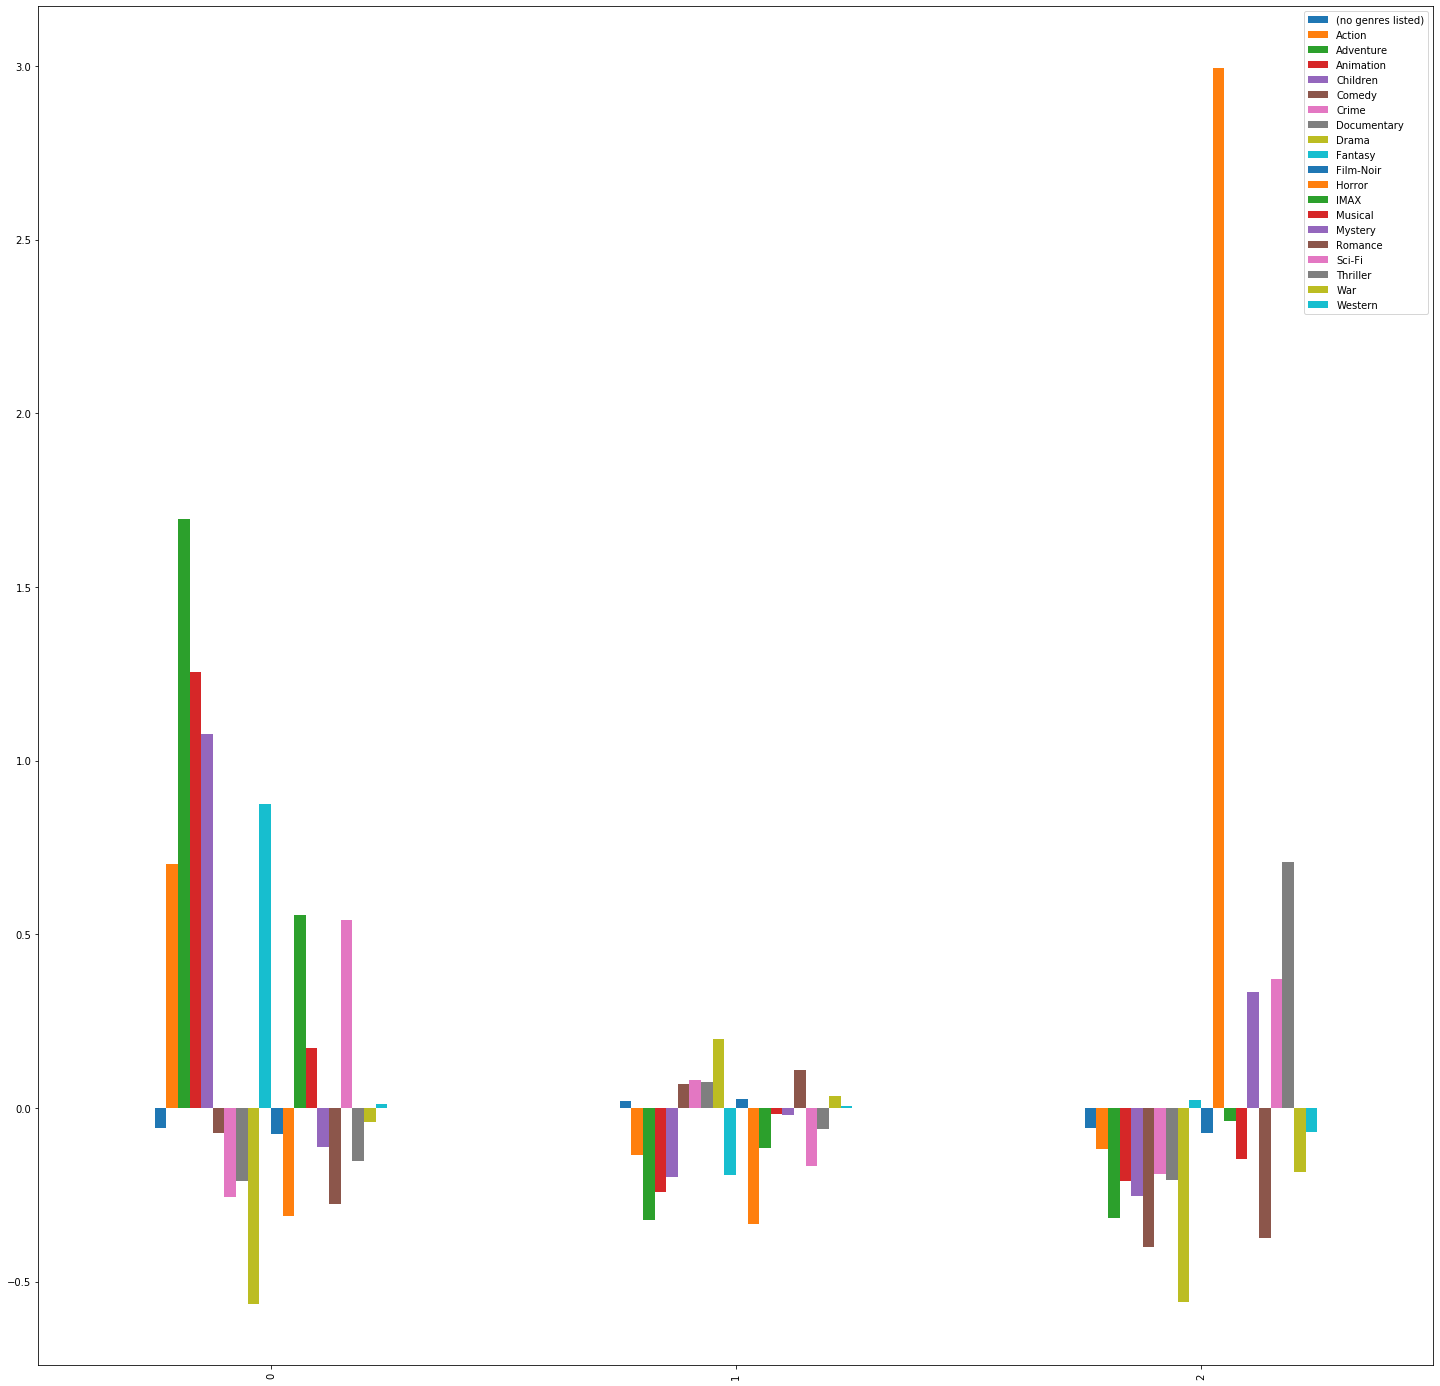

In [8]:
grupos.plot.bar(figsize=(25, 25))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb127d9e7b8>,
      dtype=object)

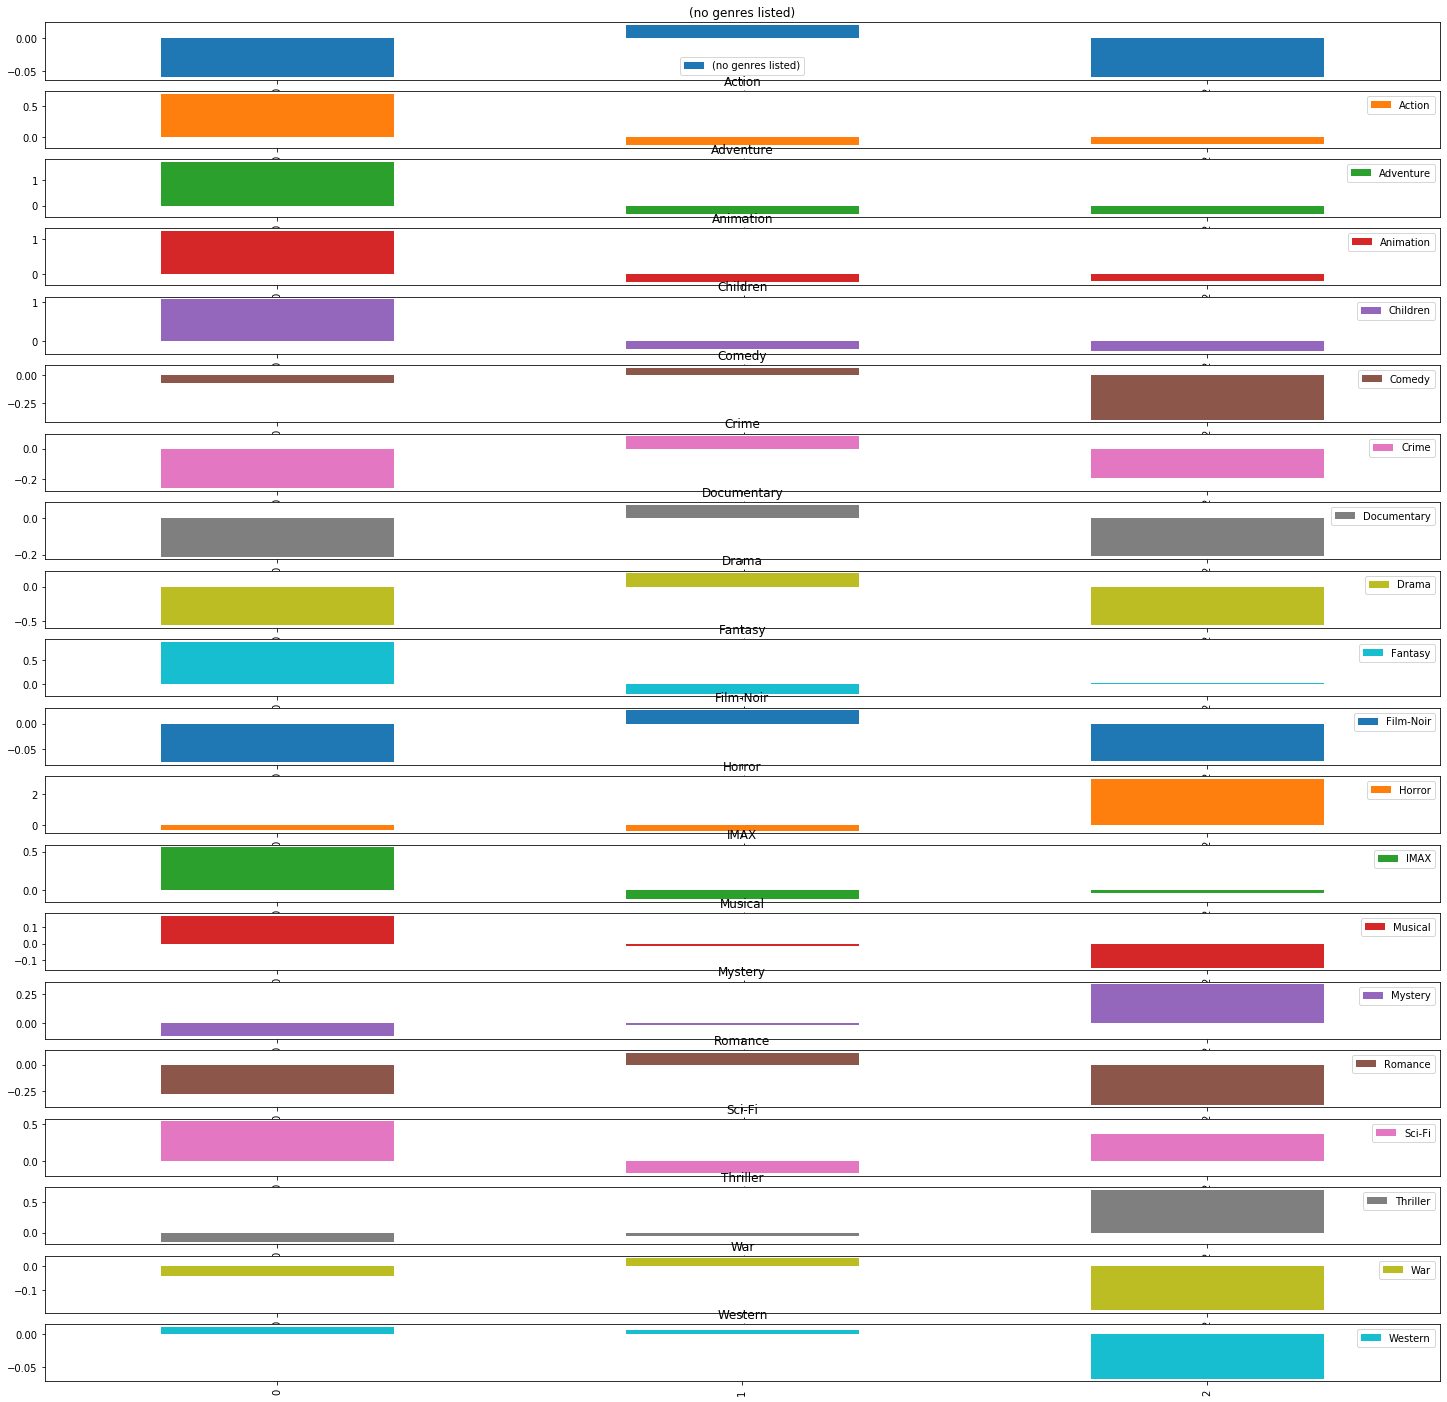

In [9]:
grupos.plot.bar(subplots=True, figsize=(25, 25), sharex=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb127d9e048>,
      dtype=object)

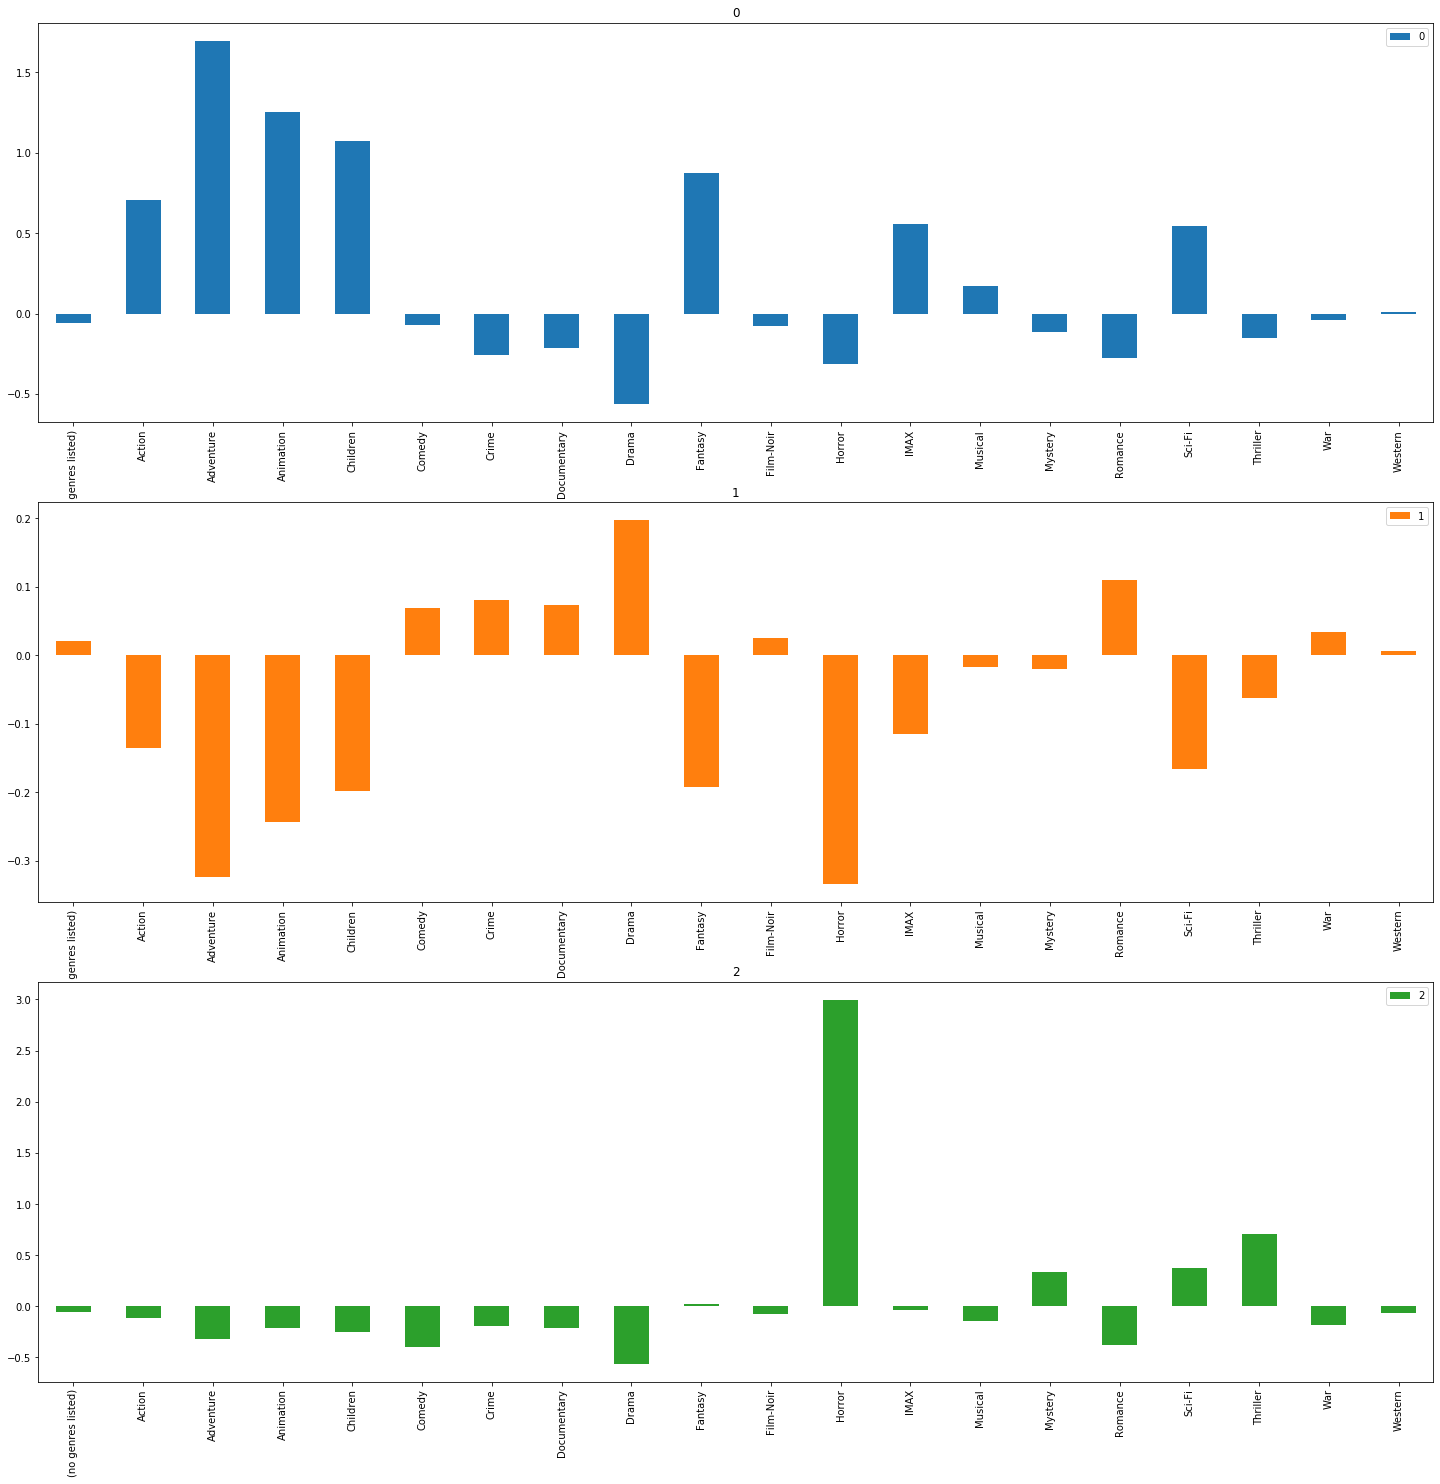

In [10]:
# No grafico acima, criamos os subplots em generos e nao em grupos.
# Resolvemos isso transpondo a matriz de grupos.
# Dessa forma, visualizamos de uma forma melhor quais categorias tem mais peso em cada um dos grupos. 
grupos.transpose().plot.bar(subplots=True, figsize=(25, 25), sharex=False)

# Filtrando os filmes pelos grupos gerados pelo KMeans, para análise

In [11]:
# Analisaremos, por exemplo, o grupo 0. Pelo grafico acima, vemos que os generos animacao, aventura, infantil e fantasia tem um peso maior.
# Vamos filtrar quais filmes o algoritmo do K-Means separou nesse grupo e ver se esses filmes estao mesmo de acordo.
grupo = 0

filtro = modelo.labels_ == grupo # do modelo do KMeans, marca como True todos os filmes que pertencem ao grupo 0 e retorna a array

print(filtro) # esse array contem um True para cada linha que pertence ao grupo 0
print(dados_dos_filmes)

dados_dos_filmes[filtro].sample(10) # traz somente as linhas marcadas como True, em uma amostra de 10 registros

# Esse filtro seria util no caso de, por exemplo, queremos indicar um novo filme a alguem que tenha assistido a um documentario da Discovery.
# Bastaria aplicarmos o filtro grupo=2 aos dados_dos_filmes, selecionar alguns dos registros do resultado e exibir ao telespectador.

[ True  True False ... False  True False]
      filme_id                                     titulo  ... War  Western
0            1                           Toy Story (1995)  ...   0        0
1            2                             Jumanji (1995)  ...   0        0
2            3                    Grumpier Old Men (1995)  ...   0        0
3            4                   Waiting to Exhale (1995)  ...   0        0
4            5         Father of the Bride Part II (1995)  ...   0        0
...        ...                                        ...  ...  ..      ...
9737    193581  Black Butler: Book of the Atlantic (2017)  ...   0        0
9738    193583               No Game No Life: Zero (2017)  ...   0        0
9739    193585                               Flint (2017)  ...   0        0
9740    193587        Bungo Stray Dogs: Dead Apple (2018)  ...   0        0
9741    193609        Andrew Dice Clay: Dice Rules (1991)  ...   0        0

[9742 rows x 23 columns]


,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7,8,Tom and Huck (1995),Adventure|Children,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3483,4756,"Musketeer, The (2001)",Action|Adventure|Drama|Romance,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3686,5076,"Adventures of Huck Finn, The (1993)",Adventure|Children|Comedy|Drama,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9388,163925,"Wings, Legs and Tails (1986)",Animation|Comedy,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9539,172587,Vacations in Prostokvashino (1980),Animation,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9636,179401,Jumanji: Welcome to the Jungle (2017),Action|Adventure|Children,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2700,3623,Mission: Impossible II (2000),Action|Adventure|Thriller,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3527,4821,Joy Ride (2001),Adventure|Thriller,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8917,135569,Star Trek Beyond (2016),Action|Adventure|Sci-Fi,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5624,27186,Kirikou and the Sorceress (Kirikou et la sorci...,Adventure|Animation|Children|Fantasy,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


 # Reduzindo as dimensões dos gêneros do KMeans e plotando o gráfico de dispersão

In [12]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)

print(visualizacao)

[[ -9.161378  -60.231094 ]
 [ 52.619686    0.9032586]
 [ 12.871882  -56.122177 ]
 ...
 [ -6.929019   10.992929 ]
 [ 17.349045   27.82553  ]
 [ -1.0299299 -30.325207 ]]


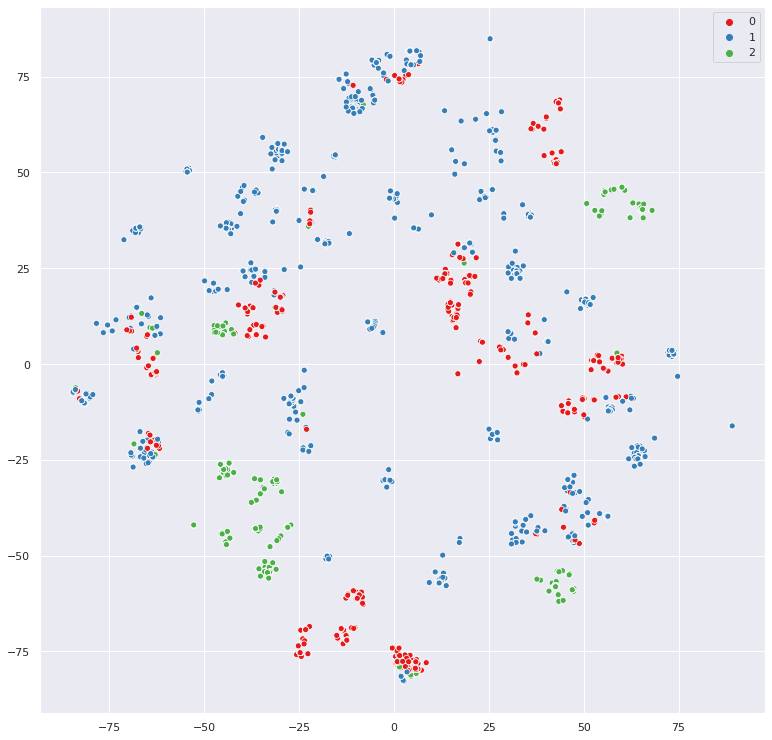

In [13]:

sns.set(rc={'figure.figsize' : (13,13)})

# O modelo.labels_ traz os grupos. Ou seja, o grafico tera pontos de 3 cores diferentes (nesse nosso exemplo)
sns.scatterplot(x=visualizacao[:, 0], y=visualizacao[:, 1], hue=modelo.labels_, palette=sns.color_palette('Set1', 3))



# Treinando o KMeans com 20 grupos e analisando o comportamento

In [14]:
print(generos_escalados.shape)

modelo = KMeans(n_clusters=20)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)

(9742, 20)


In [15]:
grupos.head()
# grupos.shape = (20, 20)

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,-0.480607,-0.285952,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.271177,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.202020,-0.132065
1,-0.059180,-0.147182,-0.262642,-0.185464,-0.239146,-0.532775,0.489914,-0.217489,0.138996,-0.025752,-0.094926,0.525732,-0.128397,-0.188419,4.000218,-0.149535,0.065561,1.173369,-0.202020,-0.132065
2,-0.059180,0.464163,-0.328905,-0.243861,-0.270451,-0.164689,2.669289,-0.217489,0.263033,-0.281564,-0.094926,-0.318115,-0.128397,-0.188419,-0.249986,-0.309968,-0.306564,0.667761,-0.202020,-0.132065
3,16.897616,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.202020,-0.132065
4,-0.059180,1.026999,1.121377,0.628865,0.482962,-0.441032,-0.162713,0.026329,-0.492945,0.801904,-0.094926,-0.081328,7.788339,0.089846,-0.088586,-0.288731,0.970137,0.068485,-0.071589,-0.034545


In [16]:
grupos_transpostos = grupos.transpose()
grupos_transpostos.head()

# grupos_transpostos.shape = (20, 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
(no genres listed),-0.059180,-0.059180,-0.059180,16.897616,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180
Action,-0.480607,-0.147182,0.464163,-0.480607,1.026999,-0.267165,-0.143230,0.402104,-0.436606,0.128485,-0.456038,2.080702,-0.440080,-0.333405,-0.480607,-0.480607,1.027261,0.087359,-0.191556,1.944462
Adventure,-0.285952,-0.262642,-0.328905,-0.385949,1.121377,0.196502,-0.353938,0.034527,-0.283666,0.249380,-0.357392,-0.385949,-0.027959,-0.317512,-0.260297,-0.274380,0.760424,0.902590,0.911226,2.591019
Animation,-0.258679,-0.185464,-0.243861,-0.258679,0.628865,-0.258679,-0.253136,-0.200424,-0.258679,-0.183231,-0.238898,-0.258679,0.563605,-0.163864,-0.258679,-0.258679,-0.092370,3.865793,-0.258679,-0.258679
Children,-0.270451,-0.239146,-0.270451,-0.270451,0.482962,-0.270451,-0.265118,-0.259242,-0.270451,-0.125281,-0.260936,-0.270451,0.721543,-0.270451,-0.270451,-0.270451,-0.270451,1.616241,3.697524,-0.270451


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb124349860>,
      dtype=object)

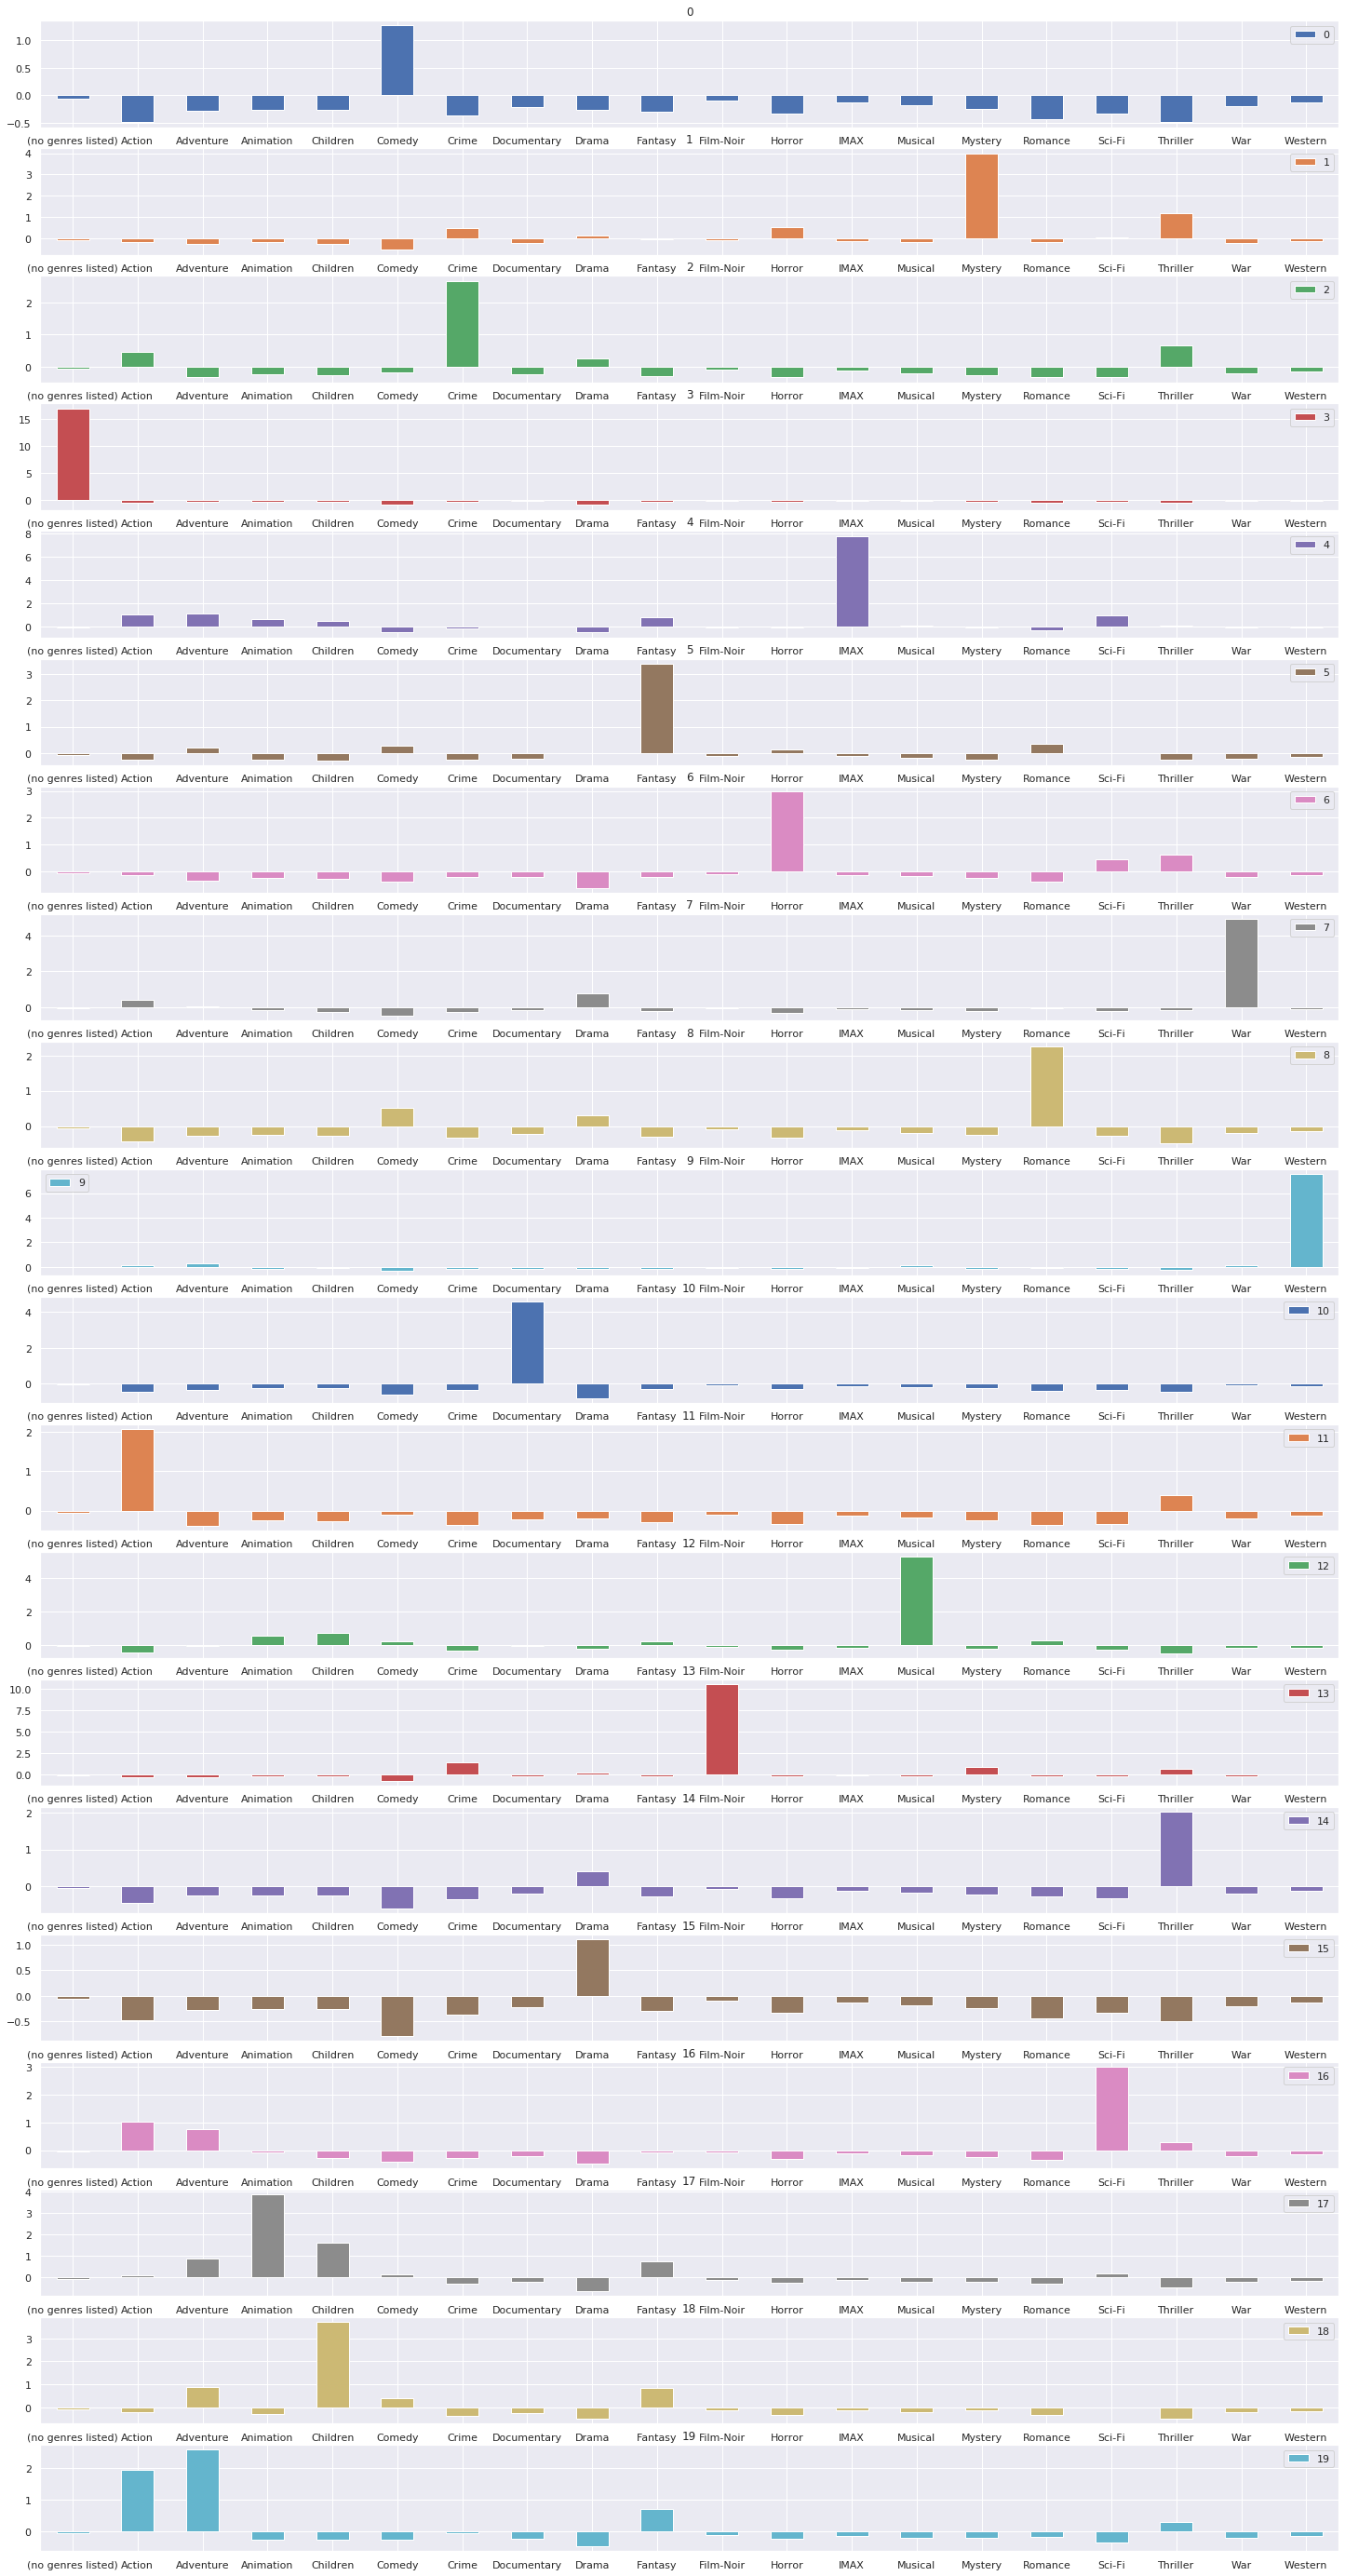

In [17]:
grupos_transpostos.plot.bar(figsize=(25, 50), sharex=False, subplots=True, rot=0)

In [18]:
# filtro para trazer os filmes marcados como Intanfil
grupo = 2

print("Modelo labels: ", modelo.labels_)

filtro = modelo.labels_ == grupo # do modelo do KMeans, marca como True todos os filmes que pertencem ao grupo 0 e retorna a array

print("Filtro: ", filtro) # esse array contem um True para cada linha que pertence ao grupo 0
print(dados_dos_filmes)

dados_dos_filmes[filtro].sample(10) # traz somente as linhas marcadas como True, em uma amostra de 10 registros

Modelo labels:  [17 18  8 ... 15 17  0]
Filtro:  [False False False ... False False False]
      filme_id                                     titulo  ... War  Western
0            1                           Toy Story (1995)  ...   0        0
1            2                             Jumanji (1995)  ...   0        0
2            3                    Grumpier Old Men (1995)  ...   0        0
3            4                   Waiting to Exhale (1995)  ...   0        0
4            5         Father of the Bride Part II (1995)  ...   0        0
...        ...                                        ...  ...  ..      ...
9737    193581  Black Butler: Book of the Atlantic (2017)  ...   0        0
9738    193583               No Game No Life: Zero (2017)  ...   0        0
9739    193585                               Flint (2017)  ...   0        0
9740    193587        Bungo Stray Dogs: Dead Apple (2018)  ...   0        0
9741    193609        Andrew Dice Clay: Dice Rules (1991)  ...   0       

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4615,6874,Kill Bill: Vol. 1 (2003),Action|Crime|Thriller,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
661,866,Bound (1996),Crime|Drama|Romance|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
8306,106785,Homefront (2013),Action|Crime|Thriller,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2020,2692,Run Lola Run (Lola rennt) (1998),Action|Crime,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7013,68205,Crank: High Voltage (2009),Action|Comedy|Crime,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3641,4998,"Defiant Ones, The (1958)",Adventure|Crime|Drama|Thriller,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2777,3715,Burglar (1987),Comedy|Crime,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7176,72167,"Boondock Saints II: All Saints Day, The (2009)",Action|Crime|Drama|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
6424,51357,Citizen X (1995),Crime|Drama|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
4892,7326,"Reckoning, The (2004)",Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


# Analisando quantos grupos devemos escolher (Elbow Method)

In [0]:
# definimos uma funcao para calcular o erro do KMeans com base no numero de grupos que queremos criar
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  # a propriedade inertia_ do modelo devolve o erro medio ao quadrado de cada ponto em relacao ao centroide
  return [numero_de_clusters, modelo.inertia_]

In [43]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]

resultado = pd.DataFrame(resultado, columns=['numero_de_grupos', 'erro'])

resultado

,numero_de_grupos,erro
0,1,194840.000000
1,2,179484.103643
2,3,166555.085561
3,4,156222.437651
4,5,146073.180381
5,6,139102.972289
6,7,128391.463716
7,8,120141.344328
8,9,111300.381770
9,10,101997.248175


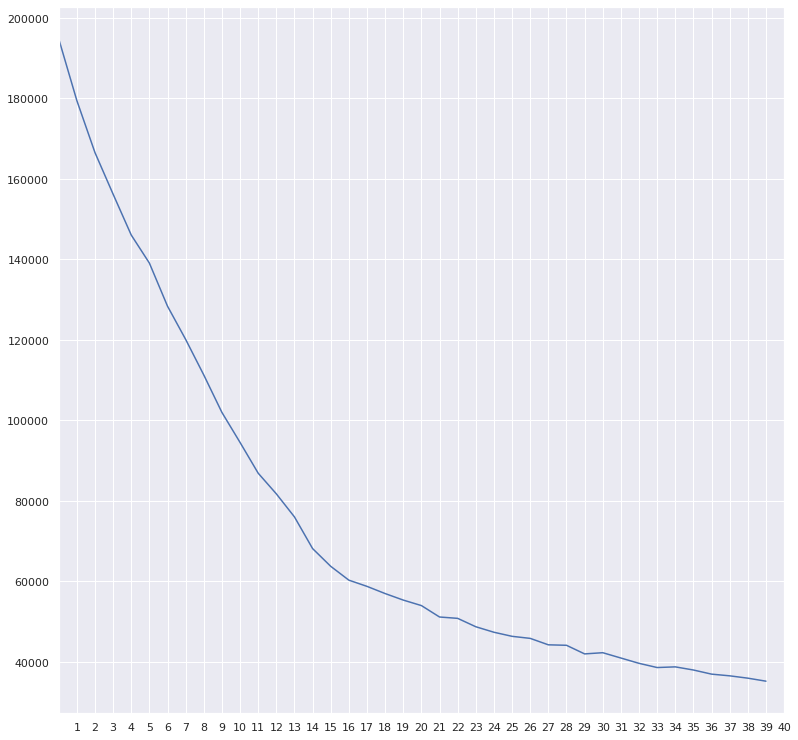

In [49]:
# vamos plotar o grafico para analisar qual sera o melhor numero de grupos atraves do elbow method
resultado.erro.plot(xticks=resultado.numero_de_grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb11c22c7f0>,
      dtype=object)

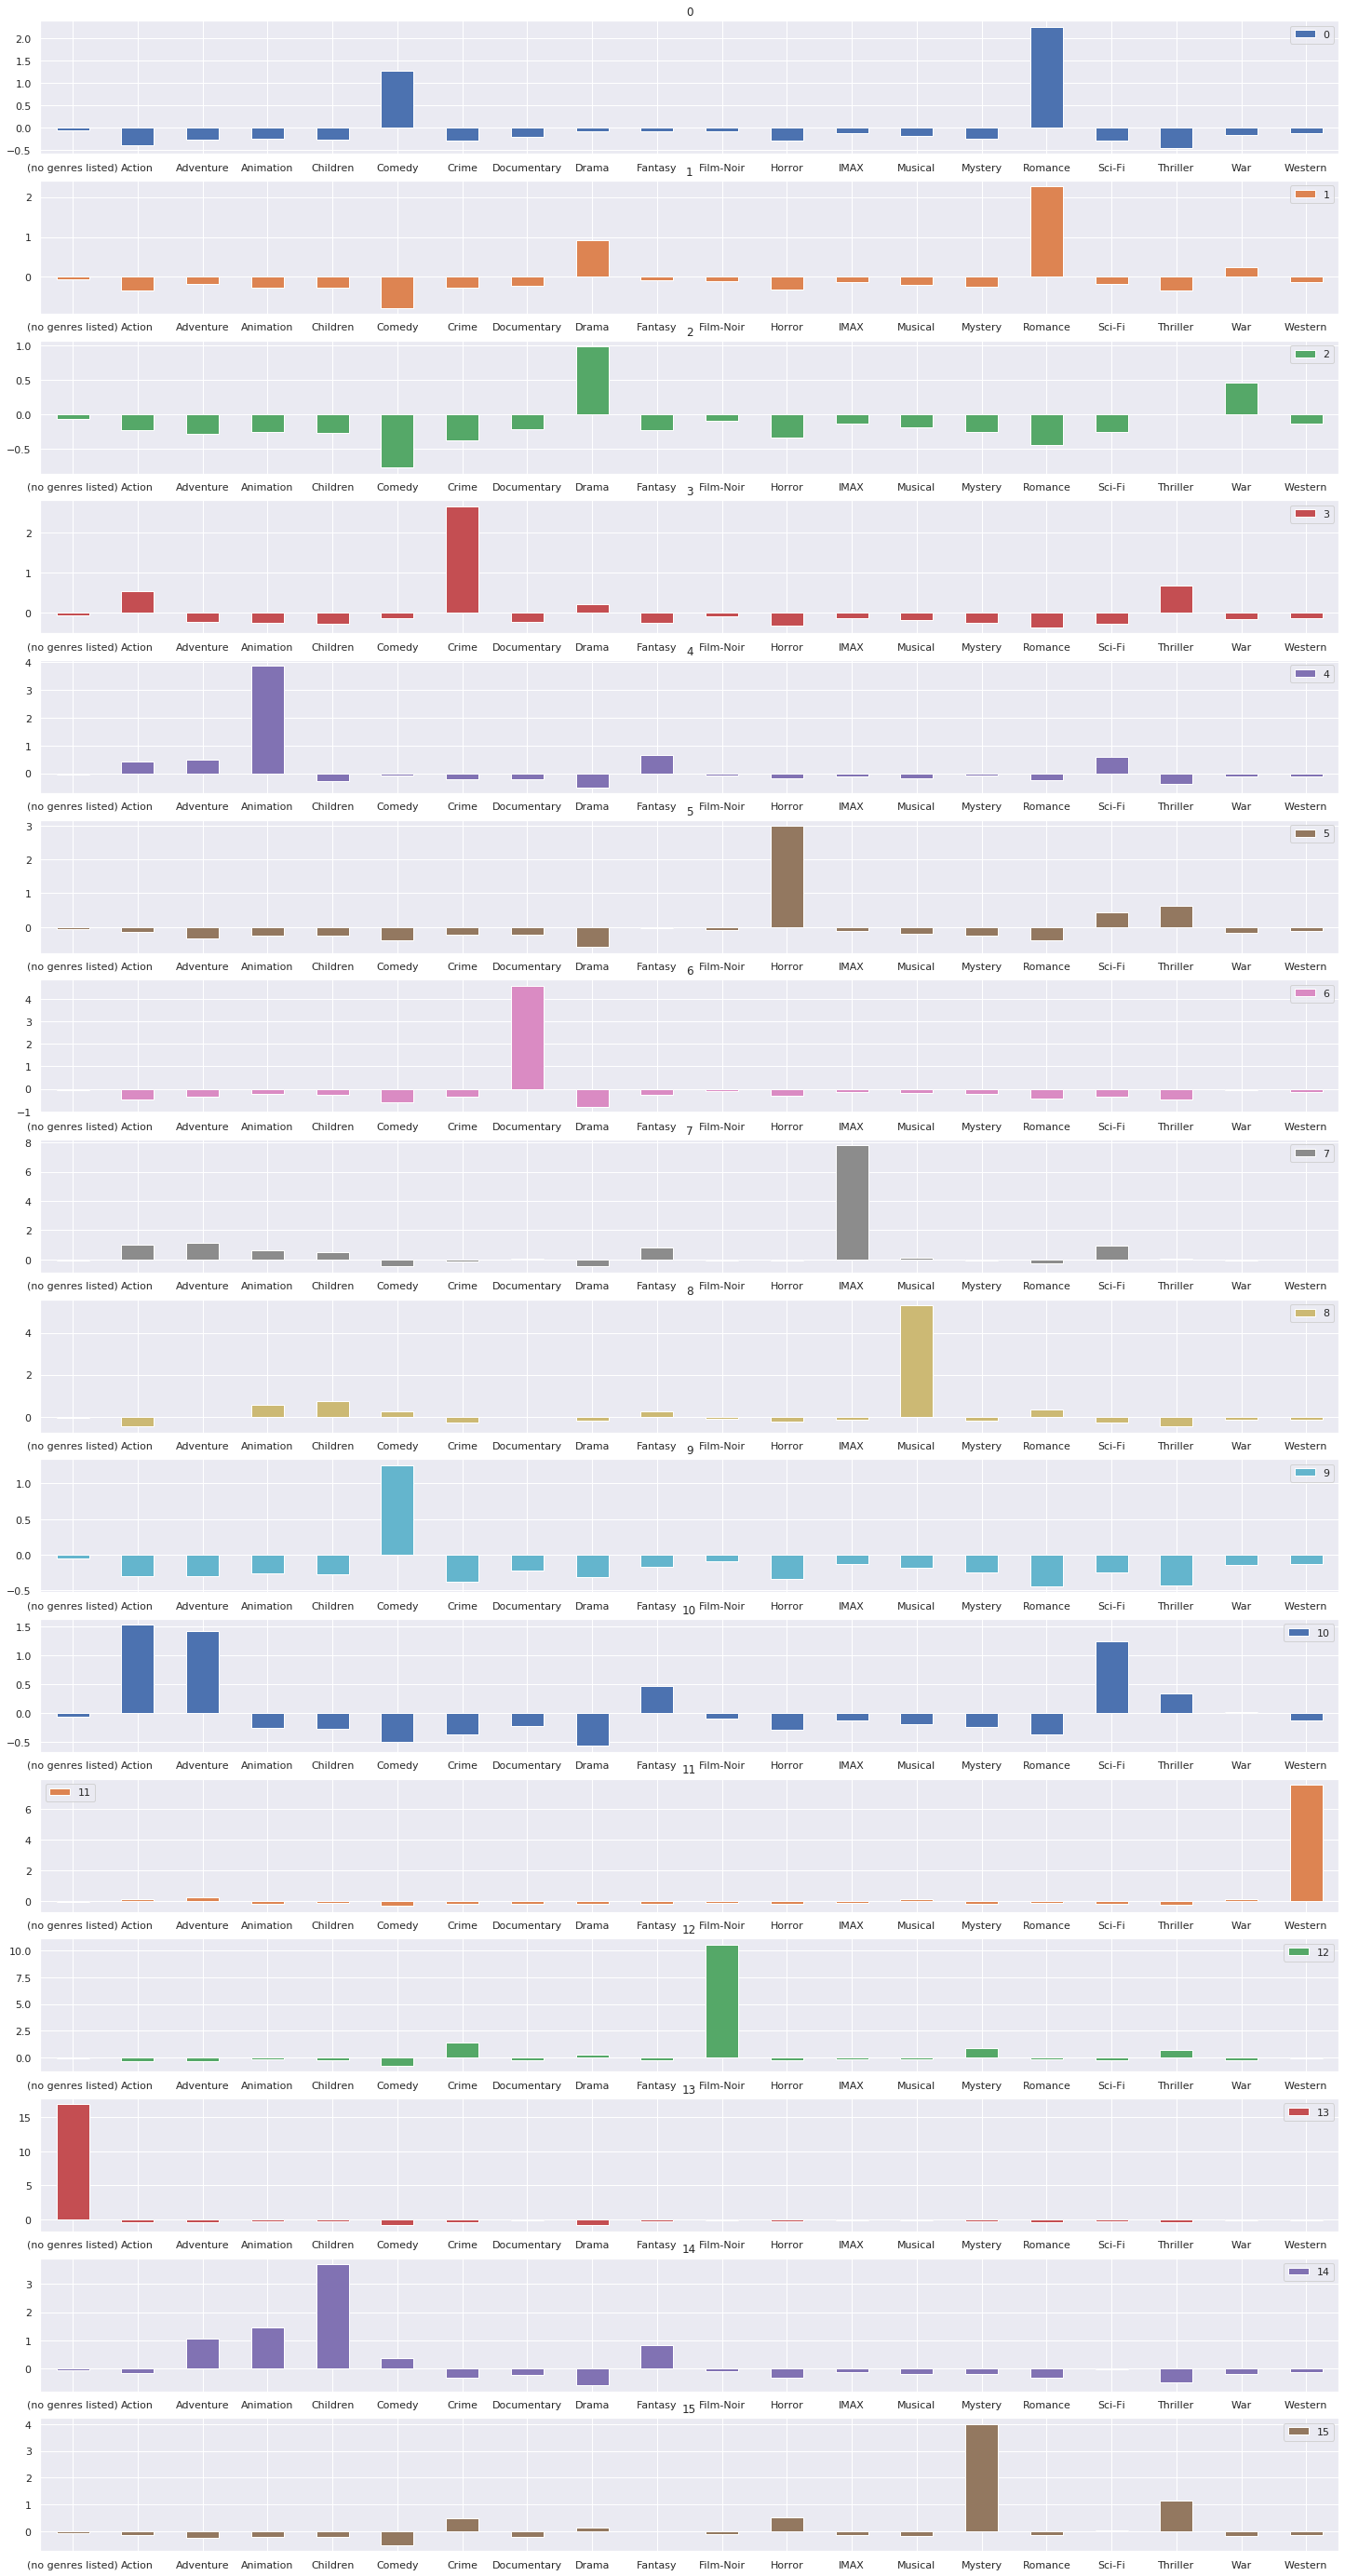

In [60]:
# analisando o grafico acima, percebemos que temos um "cotovelo" no ponto x=16. Usaremos 16 como a quantidade de grupos
modelo = KMeans(n_clusters=16)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)

grupos.transpose().plot.bar(figsize=(25, 50), sharex=False, subplots=True, rot=0)

In [61]:
# filtro para trazer os filmes marcados como Musical
grupo = 8

print("Modelo labels: ", modelo.labels_)

filtro = modelo.labels_ == grupo # do modelo do KMeans, marca como True todos os filmes que pertencem ao grupo 0 e retorna a array

print("Filtro: ", filtro) # esse array contem um True para cada linha que pertence ao grupo 0
print(dados_dos_filmes)

dados_dos_filmes[filtro].sample(10) # traz somente as linhas marcadas como True, em uma amostra de 10 registros

Modelo labels:  [14 14  0 ...  2  4  9]
Filtro:  [False False False ... False False False]
      filme_id                                     titulo  ... War  Western
0            1                           Toy Story (1995)  ...   0        0
1            2                             Jumanji (1995)  ...   0        0
2            3                    Grumpier Old Men (1995)  ...   0        0
3            4                   Waiting to Exhale (1995)  ...   0        0
4            5         Father of the Bride Part II (1995)  ...   0        0
...        ...                                        ...  ...  ..      ...
9737    193581  Black Butler: Book of the Atlantic (2017)  ...   0        0
9738    193583               No Game No Life: Zero (2017)  ...   0        0
9739    193585                               Flint (2017)  ...   0        0
9740    193587        Bungo Stray Dogs: Dead Apple (2018)  ...   0        0
9741    193609        Andrew Dice Clay: Dice Rules (1991)  ...   0       

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5472,26195,Sympathy for the Devil (1968),Documentary|Musical,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
673,888,Land Before Time III: The Time of the Great Gi...,Adventure|Animation|Children|Musical,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4349,6357,High Society (1956),Comedy|Musical|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
95,107,Muppet Treasure Island (1996),Adventure|Children|Comedy|Musical,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6787,60397,Mamma Mia! (2008),Comedy|Musical|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
7711,90343,Footloose (2011),Comedy|Drama|Musical,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4369,6390,Silk Stockings (1957),Musical,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3729,5168,Royal Wedding (1951),Comedy|Musical|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2538,3398,"Muppets Take Manhattan, The (1984)",Children|Comedy|Musical,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
700,918,Meet Me in St. Louis (1944),Musical,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


# Análise de algoritmos de agrupamento hierárquico

In [52]:
from sklearn.cluster import AgglomerativeClustering

# serao 16 grupos, como analisado no grafico do cotovelo
modelo = AgglomerativeClustering(n_clusters=16)
grupos = modelo.fit_predict(generos_escalados)

tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao


array([[-48.847088,  15.392042],
       [-64.05386 ,  14.496305],
       [ 14.291631,  41.196957],
       ...,
       [  9.183869, -17.201347],
       [ 43.03583 , -26.814047],
       [-22.86494 ,   8.484451]], dtype=float32)

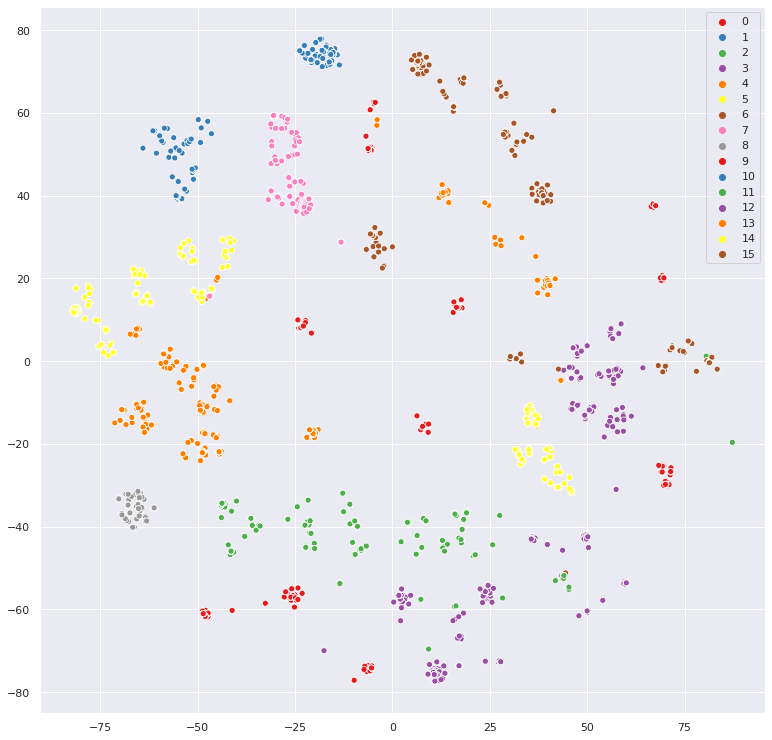

In [53]:
# plotamos o grafico para analisar como o algoritmo organizou os grupos
sns.scatterplot(x=visualizacao[:, 0], y=visualizacao[:, 1], hue=grupos, palette=sns.color_palette('Set1', 16))

# Plotando um dendrograma para analisar a estrutura hierárquica dos grupos

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb11bc934e0>,
      dtype=object)

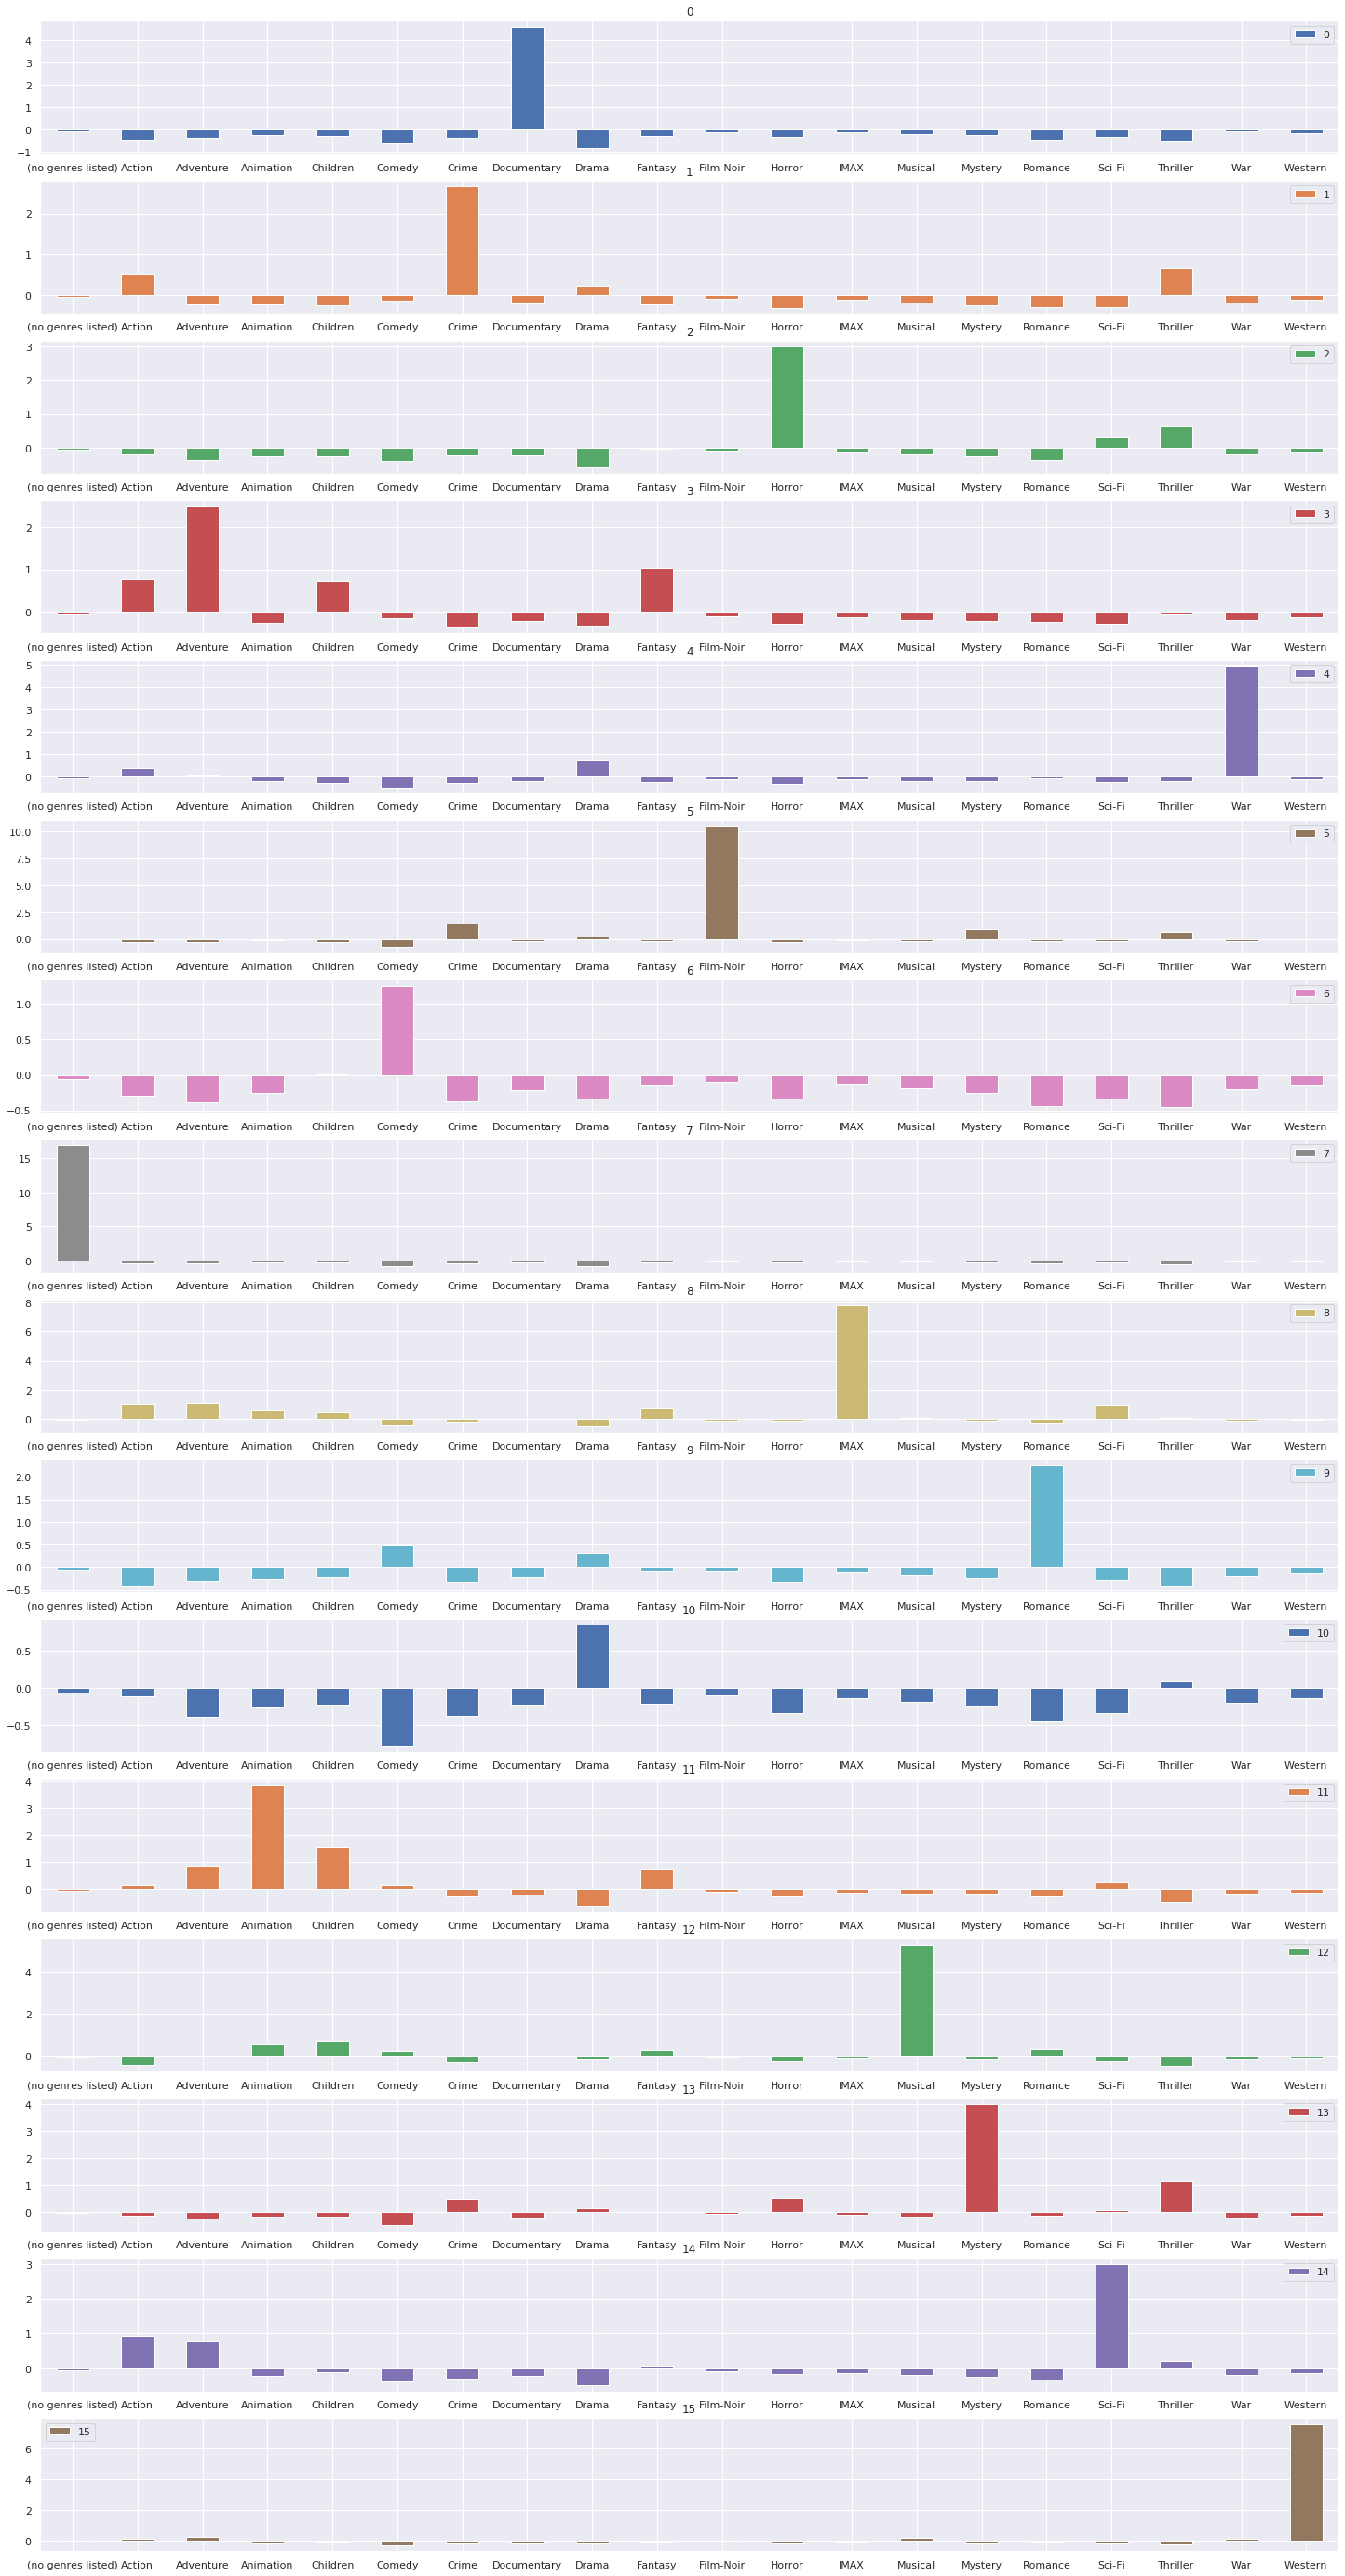

In [62]:
from scipy.cluster.hierarchy import linkage, dendrogram

# plotaremos o dendrograma dos grupos formados pelo algoritmo KMeans - copiamos o código mais acima aqui, para facilitar a visualização
modelo = KMeans(n_clusters=16)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)

grupos.transpose().plot.bar(figsize=(25, 50), sharex=False, subplots=True, rot=0)

In [63]:
matriz_de_distancias = linkage(grupos)
matriz_de_distancias

array([[ 6.        , 10.        ,  2.43470177,  2.        ],
       [ 9.        , 16.        ,  2.89625149,  3.        ],
       [ 1.        , 17.        ,  3.28787518,  4.        ],
       [ 3.        , 18.        ,  3.64462019,  5.        ],
       [ 2.        , 19.        ,  3.75561906,  6.        ],
       [14.        , 20.        ,  3.92709215,  7.        ],
       [11.        , 21.        ,  4.63375702,  8.        ],
       [13.        , 22.        ,  4.63757444,  9.        ],
       [ 0.        , 23.        ,  5.14215242, 10.        ],
       [ 4.        , 24.        ,  5.22999293, 11.        ],
       [12.        , 25.        ,  5.77793634, 12.        ],
       [15.        , 26.        ,  7.85178735, 13.        ],
       [ 8.        , 27.        ,  8.21135611, 14.        ],
       [ 5.        , 28.        , 10.81666198, 15.        ],
       [ 7.        , 29.        , 17.06117151, 16.        ]])

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b'],
 'dcoord': [[0.0, 2.4347017668157815, 2.4347017668157815, 0.0],
  [0.0, 2.8962514870853155, 2.8962514870853155, 2.4347017668157815],
  [0.0, 3.2878751846212233, 3.2878751846212233, 2.8962514870853155],
  [0.0, 3.6446201877748012, 3.6446201877748012, 3.2878751846212233],
  [0.0, 3.7556190609626445, 3.7556190609626445, 3.6446201877748012],
  [0.0, 3.9270921541466532, 3.9270921541466532, 3.7556190609626445],
  [0.0, 4.633757017505748, 4.633757017505748, 3.9270921541466532],
  [0.0, 4.637574443137879, 4.637574443137879, 4.633757017505748],
  [0.0, 5.142152423915566, 5.142152423915566, 4.637574443137879],
  [0.0, 5.22999293107863, 5.22999293107863, 5.142152423915566],
  [0.0, 5.7779363416945975, 5.7779363416945975, 5.22999293107863],
  [0.0, 7.851787354298969, 7.851787354298969, 5.7779363416945975],
  [0.0, 8.211356107058979, 8.211356107058979, 7.851787354298969],
  [0.0, 

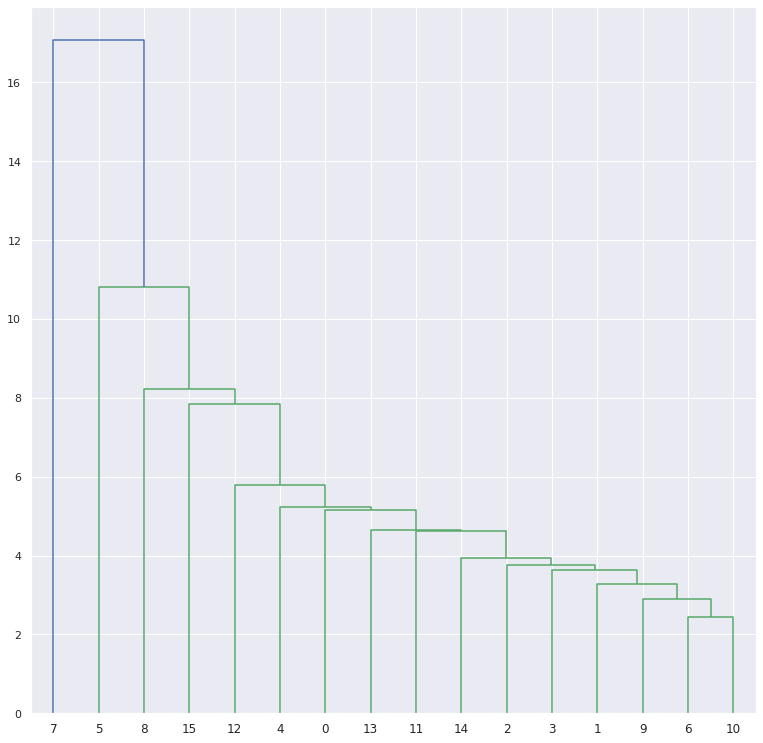

In [64]:
# plotando o dendrograma dos grupos formados pelo KMeans
dendrograma = dendrogram(matriz_de_distancias)
dendrograma